In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### LaFleur log(TX/TX_ref) to bin

In [2]:
Lagator_Pl_TX = pd.read_csv('../../Data/LaFleur_supp/supp_9_Lagator_Pl.csv')[['Promoter', 'Observed log(TX/Txref)', 'Normalized Transcription Rates [TX/TXref]']]

Lagator_Pl_TX['Promoter'] = Lagator_Pl_TX['Promoter'].str.upper()

In [3]:
Lagator_Pl_bin = pd.read_csv('../../Data/Lagator/Pl_constitutive.csv')[['sequence', 'Mean', 'Median', 'Mode']]

Lagator_Pl_bin = Lagator_Pl_bin.rename(columns={'sequence': 'Promoter', 'Median': 'Median Bin', 'Mean': 'Mean Bin', 'Mode': 'Mode Bin'})

Lagator_Pl_bin['Promoter'] = Lagator_Pl_bin['Promoter'].str.upper()

In [4]:
merged_Pl = Lagator_Pl_TX.merge(Lagator_Pl_bin, on='Promoter', how='left')

not_merged_Pl = merged_Pl[merged_Pl.isna().any(axis=1)]

# merged_Pl.head()
not_merged_Pl.head()


,Promoter,Observed log(TX/Txref),Normalized Transcription Rates [TX/TXref],Mean Bin,Median Bin,Mode Bin


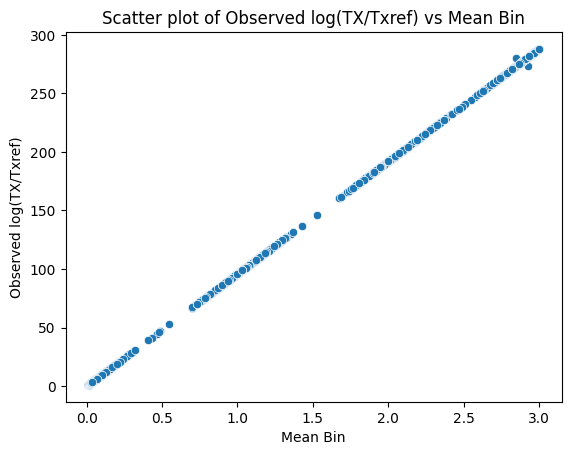

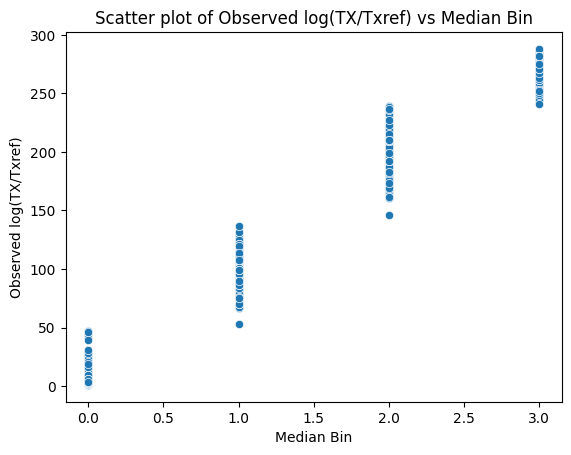

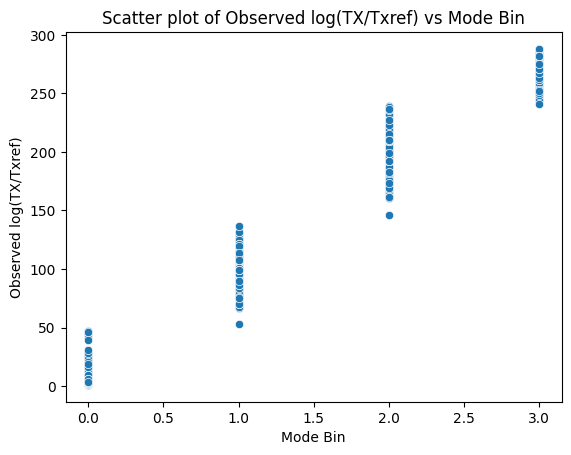

In [5]:
for bin_method in ['Mean Bin', 'Median Bin', 'Mode Bin']:

    sns.scatterplot(x=bin_method, y='Normalized Transcription Rates [TX/TXref]', data=merged_Pl)

    plt.title(f'Scatter plot of Observed log(TX/Txref) vs {bin_method}')
    plt.xlabel(bin_method)
    plt.ylabel('Observed log(TX/Txref)')

    plt.show()

/var/folders/lw/ztjsnj291fqg7xpszzzsl6pm0000gn/T/ipykernel_43751/118154359.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


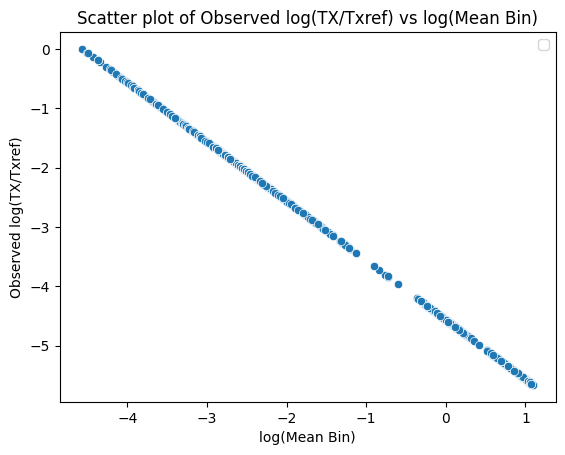

In [6]:
sns.scatterplot(x=np.log(merged_Pl['Mean Bin']), y=merged_Pl['Observed log(TX/Txref)'])

plt.title('Scatter plot of Observed log(TX/Txref) vs log(Mean Bin)')
plt.xlabel('log(Mean Bin)')
plt.ylabel('Observed log(TX/Txref)')
plt.legend()

plt.show()


### LaFleur log(TX/TX_ref) to platereader fluorescence

In [7]:
Lagator_36N_TX = pd.read_csv('../../Data/LaFleur_supp/supp_8_Lagator_36N.csv')[['Promoter', 'Observed log(TX/Txref)', 'Normalized Transcription Rates [TX/TXref]']]

Lagator_36N_TX['Promoter'] = Lagator_36N_TX['Promoter'].str.slice(40, -40).str.upper()

Lagator_36N_TX.head()

,Promoter,Observed log(TX/Txref),Normalized Transcription Rates [TX/TXref]
0,AGGCTATCATGTCGACAAAACATTCATCGTGTGTGG,-6.023111,412.861164
1,TCCCCGATAACTTGCTATAGTCATATCACAATCCGT,-6.067881,431.764763
2,TAACGGAACGCTGTCTGAAGGATGAGTGTGAGGGAG,-3.655816,38.699082
3,GTTCAGTCTAGACTAGCCCTTCGTCTAGTGGTACTG,-6.204211,494.828246
4,GTCTTGACAATCTAATGTCCTGATATACCCTGACAT,-6.065913,430.915994


In [8]:
Lagator_36N_fl = pd.read_csv('../../Data/Lagator/unique_36_bp_sequences.csv')[['36N sequence', 'Platereader fluorescence (low gain, monochromator, normalized to OD and to bin 1 fluorescence)']]

Lagator_36N_fl = Lagator_36N_fl.rename(columns={'36N sequence': 'Promoter', 'Platereader fluorescence (low gain, monochromator, normalized to OD and to bin 1 fluorescence)': 'fluorescence'})

Lagator_36N_fl.head()

,Promoter,fluorescence
0,AAGCCCCCCCGTCAACATCTGTGTTGAAGGTGACAT,1.53
1,GAATTCGATAGCTCTTATATCACTAACATCAGAGTG,0.91
2,GGTATCCAGCAAACGAACGAAAAAGTCGTGGAACGA,1.12
3,ACCCCCAAGTCCCGCGTGTGAGTGCCACCATTAGGT,0.83
4,CTAGAGTCTAATACTAAAACCTCGGATTCCTGAGGT,1.23


In [9]:
merged_36N = Lagator_36N_TX.merge(Lagator_36N_fl, on='Promoter', how='right')

print(f'Lagator_36N_TX length: {len(Lagator_36N_TX)}')
print(f'Lagator_36N_fl length: {len(Lagator_36N_fl)}')
print(f'merged_36N length: {len(merged_36N)}')

Lagator_36N_TX length: 11485
Lagator_36N_fl length: 71
merged_36N length: 71


In [10]:
merged_36N.head()

,Promoter,Observed log(TX/Txref),Normalized Transcription Rates [TX/TXref],fluorescence
0,AAGCCCCCCCGTCAACATCTGTGTTGAAGGTGACAT,-3.442169,31.254668,1.53
1,GAATTCGATAGCTCTTATATCACTAACATCAGAGTG,-3.910456,49.921726,0.91
2,GGTATCCAGCAAACGAACGAAAAAGTCGTGGAACGA,-3.666591,39.118324,1.12
3,ACCCCCAAGTCCCGCGTGTGAGTGCCACCATTAGGT,-3.574440,35.674620,0.83
4,CTAGAGTCTAATACTAAAACCTCGGATTCCTGAGGT,-4.640646,103.611310,1.23


In [11]:
# None of these 7 values appear in LaFleur's supplementary data

not_merged_36N = merged_36N[merged_36N.isna().any(axis=1)]
merged_36N = merged_36N.dropna()

not_merged_36N.head(None)

,Promoter,Observed log(TX/Txref),Normalized Transcription Rates [TX/TXref],fluorescence
9,CCGTTTAAGCAGCGGTTATTTTTAATTAGTGCTTAC,NaN,NaN,1.05
17,GGCCTGAGAAAAGTAGCAGTTTCAAATGGTCGCATG,NaN,NaN,1.34
26,GGAGGACACTCATTTTGCGGTCAGATCCCCGCGCGT,NaN,NaN,1.16
57,TCTTCCTTGATCAAAGGTCAAATAGTGGTTACGTTA,NaN,NaN,44.34
64,GACACCAGATGGAATTTGAGCCATCATGCAGTCATC,NaN,NaN,267.37
68,CTAATTACTTGTCACCTGGCGGCAAATGCGTTATCA,NaN,NaN,279.38
70,CTTGACGGCACGCATGTGCCCACGTAGAATGTCTAT,NaN,NaN,180.75


/var/folders/lw/ztjsnj291fqg7xpszzzsl6pm0000gn/T/ipykernel_43751/422958623.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


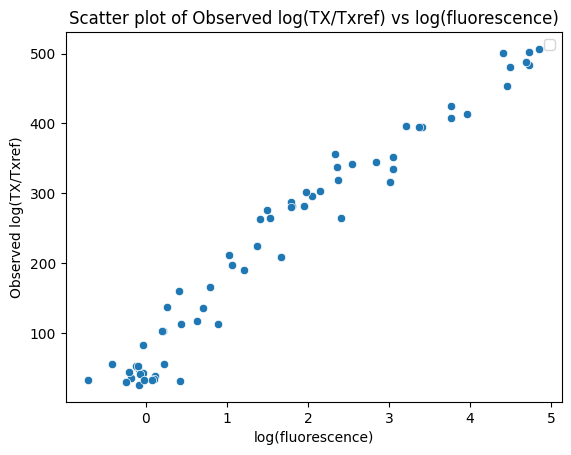

In [14]:
sns.scatterplot(x=np.log(merged_36N['fluorescence']), y=merged_36N['Normalized Transcription Rates [TX/TXref]'])

plt.title('Scatter plot of Observed TX/Txref vs log(fluorescence)')
plt.xlabel('log(fluorescence)')
plt.ylabel('Observed log(TX/Txref)')
plt.legend()

plt.show()


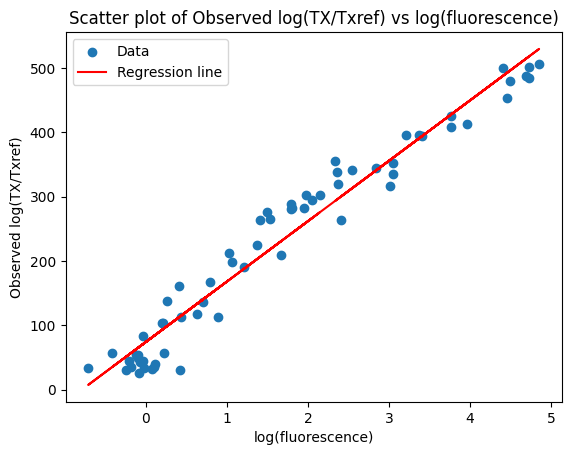

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ensure data is available and processed
X = np.log(merged_36N['fluorescence']).values.reshape(-1, 1)
y = merged_36N['Normalized Transcription Rates [TX/TXref]']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Scatter plot of Observed log(TX/Txref) vs log(fluorescence)')
plt.xlabel('log(fluorescence)')
plt.ylabel('Observed log(TX/Txref)')
plt.legend()
plt.show()
